# 04 - Evaluation

This notebook evaluates the trained model using MAE, R², and helpful plots.

MAE: 23.30
R^2: 0.877


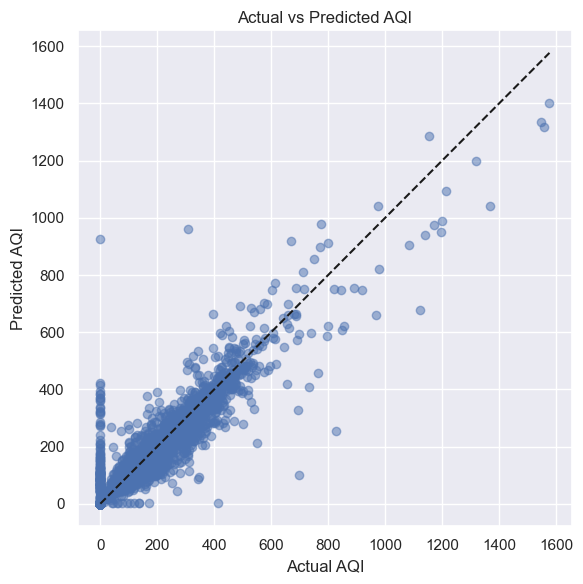

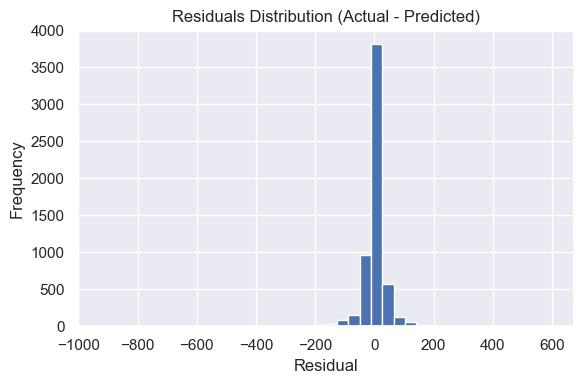

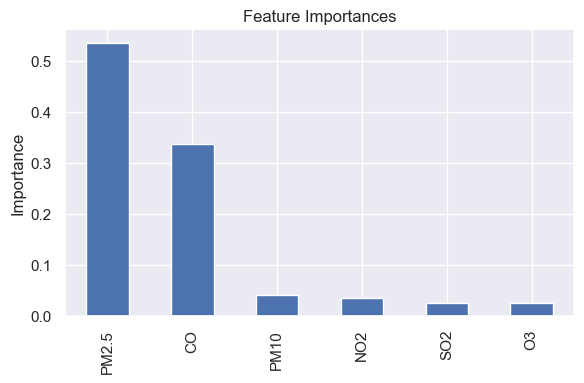

✅ Model evaluation complete.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib

sns.set(style='darkgrid')

PROC_PATH = '../data/processed_air_quality.csv'
MODEL_PATH = r"C:\air_quality\model\aqi_model.pkl"


# Load data & model
df = pd.read_csv(PROC_PATH)
model = joblib.load(MODEL_PATH)

FEATURES = ['PM2.5','PM10','NO2','SO2','CO','O3']
for f in FEATURES:
    if f not in df.columns:
        df[f] = 0.0

df = df.fillna(0)
X = df[FEATURES]
y = df['AQI']

# Train/validation split (same seed for reproducibility)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Predictions
y_pred = model.predict(X_val)

# Metrics
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f'MAE: {mae:.2f}\nR^2: {r2:.3f}')

# Scatter: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--')
plt.xlabel('Actual AQI'); plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.tight_layout()
plt.show()

# Residuals
res = y_val - y_pred
plt.figure(figsize=(6,4))
plt.hist(res, bins=40)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual'); plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Feature importance
if hasattr(model, 'feature_importances_'):
    importances = pd.Series(model.feature_importances_, index=FEATURES).sort_values(ascending=False)
    plt.figure(figsize=(6,4))
    importances.plot(kind='bar')
    plt.title('Feature Importances')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

print('✅ Model evaluation complete.')